# Домашнее задание "Теория оптимизации".

### Задание.

При фиксированном seed=42 поразбирайтесь и поэкспериментируйте с параметрами алгоритма дифференциальной эволюции: strategy, popsize, tol, mutation, recombination и updating.

Постройте графики количества итераций оптимизации функции ackley от значения параметра.

### Дополнительное задание.

Найти множество параметров (strategy=..., ..., updating=...), которые требуют минимального количества итераций.

In [1]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

In [2]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]

result = differential_evolution(ackley, bounds, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

In [3]:
def result_params(strategy='best1bin', popsize=15, tol=0.01, mutation=(0.5, 1), recombination=0.7, updating='immediate'):
    result = differential_evolution(ackley, bounds, seed=42, strategy=strategy, popsize=popsize, tol=tol, mutation=mutation, recombination=recombination, updating=updating)
    return result.nit

In [4]:
strategy_list = ['best1bin',
                 'best1exp',
                 'rand1exp',
                 'randtobest1exp',
                 'currenttobest1exp',
                 'best2exp',
                 'rand2exp',
                 'randtobest1bin',
                 'currenttobest1bin',
                 'best2bin',
                 'rand2bin',
                 'rand1bin'
                ]
height_list = [result_params(strategy=strat) for strat in strategy_list]
height_list

[90, 147, 246, 156, 1000, 244, 341, 101, 1000, 166, 232, 168]

<BarContainer object of 12 artists>

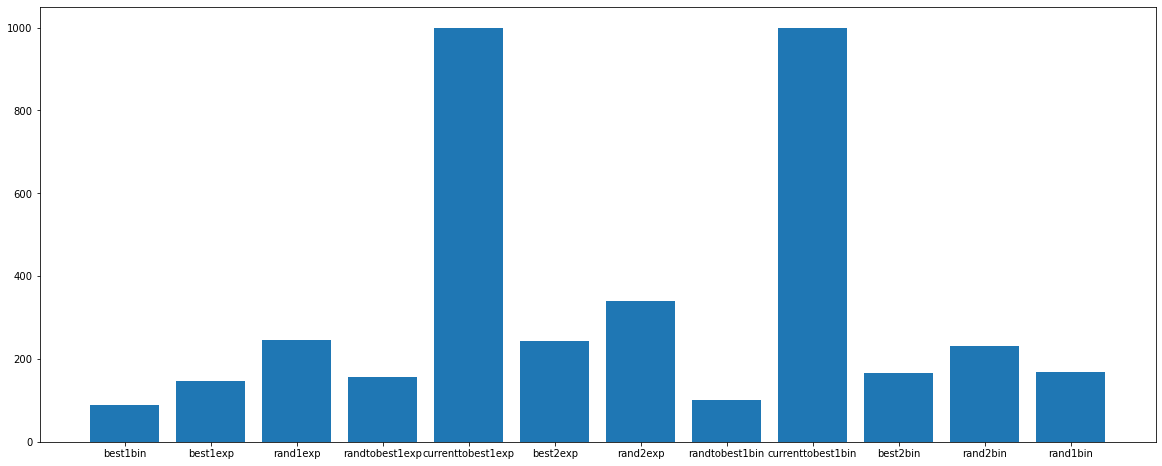

In [5]:
plt.figure(figsize=(20, 8))
plt.bar(x=strategy_list, height=height_list)

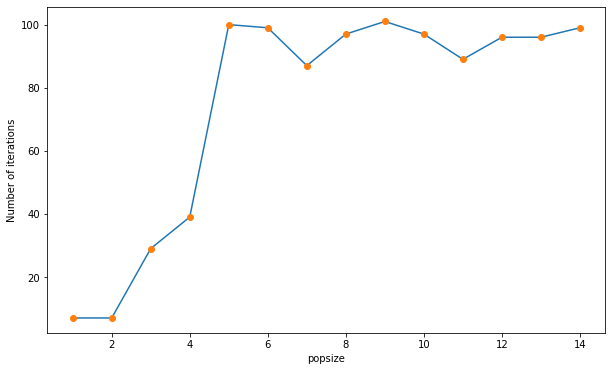

In [6]:
poplist = list(range(1,15,1))
pop_results = [result_params(popsize=pops) for pops in poplist]
plt.figure(figsize=(10, 6))
plt.xlabel('popsize')
plt.ylabel('Number of iterations')
plt.plot(poplist, pop_results)
plt.plot(poplist, pop_results, 'o')

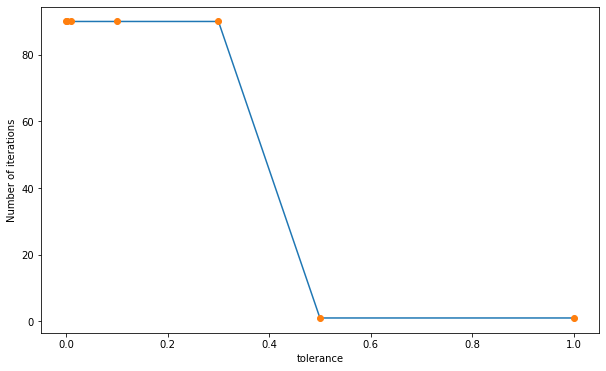

In [7]:
tollist = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 1]
tol_results = [result_params(tol=t) for t in tollist]
plt.figure(figsize=(10, 6))
plt.xlabel('tolerance')
plt.ylabel('Number of iterations')
plt.plot(tollist, tol_results)
plt.plot(tollist, tol_results, 'o')

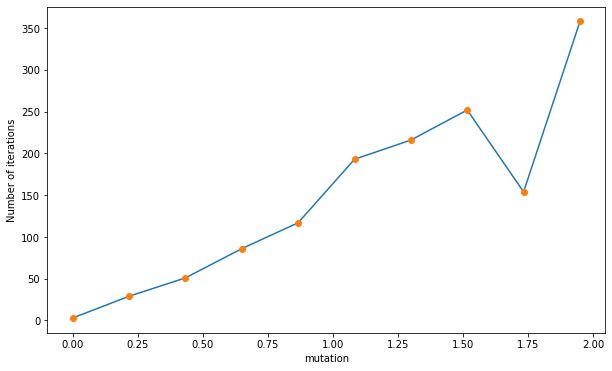

In [8]:
mutlist = list(np.linspace(0, 1.95, num=10))
mut_results = [result_params(mutation=t) for t in mutlist]
plt.figure(figsize=(10, 6))
plt.xlabel('mutation')
plt.ylabel('Number of iterations')
plt.plot(mutlist, mut_results)
plt.plot(mutlist, mut_results, 'o')

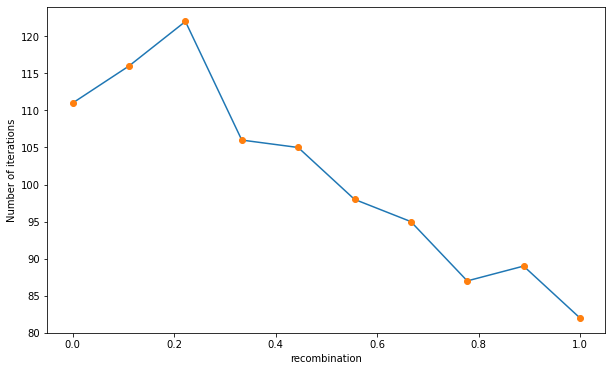

In [9]:
recomblist = list(np.linspace(0, 1, num=10))
recomb_results = [result_params(recombination=t) for t in recomblist]
plt.figure(figsize=(10, 6))
plt.xlabel('recombination')
plt.ylabel('Number of iterations')
plt.plot(recomblist, recomb_results)
plt.plot(recomblist, recomb_results, 'o')

<BarContainer object of 2 artists>

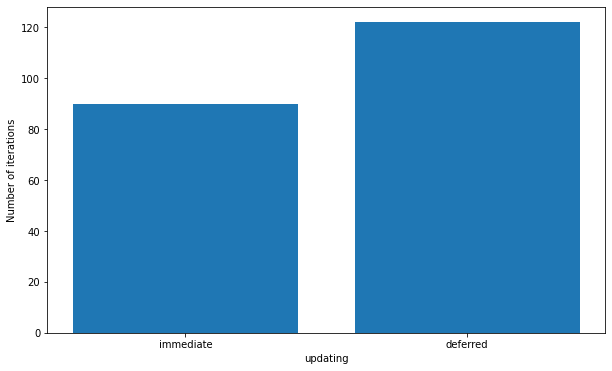

In [10]:
updlist = ['immediate', 'deferred']
plt.figure(figsize=(10, 6))
plt.xlabel('updating')
plt.ylabel('Number of iterations')
plt.bar(x=updlist, height=[result_params(updating=t) for t in updlist])

In [11]:
result = differential_evolution(ackley, bounds, seed=42, strategy='currenttobest1exp', popsize=7, updating='deferred', tol=0.1, mutation=0.995, recombination=1)
result

     fun: 2.5975406018563518e-05
 message: 'Optimization terminated successfully.'
    nfev: 914
     nit: 51
 success: True
       x: array([2.79048871e-06, 8.74864598e-06])

In [12]:
result = differential_evolution(ackley, bounds, seed=42, strategy='best1bin', popsize=5, updating='deferred', tol=0.1, mutation=0.995, recombination=0)
result

     fun: 1.929215232010506e-08
     jac: array([-0.28791014,  0.43518114])
 message: 'Optimization terminated successfully.'
    nfev: 543
     nit: 41
 success: True
       x: array([-5.64249281e-09, -3.83218742e-09])